# Assignment \#2 - the Hawaii-Emperor Seamount Chain (174 points)

__(Instruction)__ The purpose of this assignment is to make sure you have basic skills to take advantage of Numpy in scientific data analysis.

- All the array calculations should take advantage of the vectorized operations in numpy.  No iteration is allowed.  If used, it will be regarded as a wrong answer.  
- __Email__ the *.ipynb file to the instructor. Name the title of the email by Python-HW02 and the attached file as YourLastName-YourFirstName-HW02.ipynb

__(Due)__ Oct. 6, 2020 (Thursday) 11:59 pm

## 1. Background

The outermost shell of the solid Earth consists of more than 40 rigid plates (~200 km thick) which are moving.  Many large scale geological processes can be explained by the interactions between the plates, plate tectonics.  One of the most notable geological features related to the plate tectonics, can be found under the Pacific ocean.  The image below shows two linear structures in the ocean bottom topography of the Pacific: Hawaiian seamount chain and Emperor seamount chain.  This linear alignment of the seamounts extends more than 6000 km.    

![](Oceanfloor.jpg)

One of the most popular hypothesis to explain the formation of such large scale seamount chains is that a fixed source of plume from the deep mantle (about 3000 km deep) provides materials to the surface which is moving north west (Pacific plate).  An [animation here](https://youtu.be/QtIQ7-iOFg8) shows how such process can form the seamount chains.

As shown in the figure below, Earth scientists have measured the ages of the seamounts.  Assuming that the current eruption location at Hawaii (Kilauea) has been the location of the plume for the last 60 Ma, we can calculate the velocity of plate motion over the period.

![](Map.jpg)
![](Kilauea.gif)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

Below is an example of using plot, and axhline funcions, and how to add title, labels and legend. You can follow this example to make your own plots in this homework. 

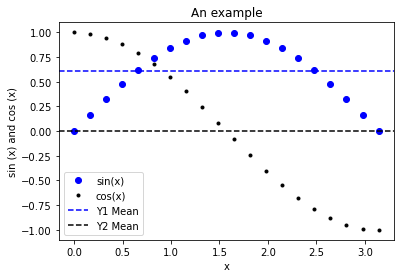

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,np.pi,20)
y1=np.sin(x)
y2=np.cos(x)
plt.plot(x,y1, 'bo', label='sin(x)')
plt.plot(x,y2,'k.',label='cos(x)')
plt.axhline(y1.mean(), c='b', ls='--', label='Y1 Mean')
plt.axhline(y2.mean(), c='k', ls='--', label='Y2 Mean')
plt.ylabel('sin (x) and cos (x)')
plt.xlabel('x');
plt.title('An example')
plt.legend();

## 2. Read dataset (2 pts)

I obtained a dataset on the seamounts along the Hawaii-Emperor chain from https://www.soest.hawaii.edu/GG/HCV/haw_formation.html and saved it in `Hawaii_emperor_data.txt`.  You will use this dataset for this assignment.

In [5]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 72A2-6070

 Directory of C:\Users\limm0\OneDrive\SES494-598\assignment_2

09/21/2020  02:39 PM    <DIR>          .
09/21/2020  02:39 PM    <DIR>          ..
02/06/2019  09:11 PM            22,100 .assignment_2.ipynb.sage-jupyter2
02/06/2019  09:11 PM            27,870 .assignment_2_answers.ipynb.sage-jupyter2
09/21/2020  02:34 PM    <DIR>          .ipynb_checkpoints
09/21/2020  02:39 PM            25,244 assignment_2.ipynb
09/21/2020  02:35 PM                49 DUE_DATE.txt
02/06/2019  09:11 PM               598 Hawaii_emperor_data.txt
02/06/2019  09:11 PM            44,046 Kilauea.gif
02/06/2019  09:11 PM           243,473 Map.jpg
02/06/2019  09:11 PM            23,952 Oceanfloor.jpg
               8 File(s)        387,332 bytes
               3 Dir(s)  1,890,759,245,824 bytes free


You may check the contents of the file.

In [6]:
%less Hawaii_emperor_data.txt

Distance along chain (km)	K-Ar age (Ma)	sigma age (Ma)
0	0.00	0.00
54	0.38	0.05
100	0.43	0.02
182	0.75	0.04
185	1.03	0.18
221	1.32	0.04
226	1.28	0.04
256	1.76	0.04
280	1.90	0.06
339	2.60	0.1
374	3.70	0.1
519	5.10	0.20
565	4.89	0.11
600	4.00	0.2
780	7.20	0.3
913	9.20	0.8
930	9.60	0.8
1058	10.30	0.4
1209	12.00	0.4
1256	13.00	0.6
1435	12.30	1.0
1818	19.90	0.3
1841	26.60	2.7
2281	20.60	2.7
2432	27.70	0.6
2600	28.00	0.4
2825	27.40	0.5
3128	38.60	0.3
3280	38.70	0.9
3493	42.40	2.3
3520	43.40	1.6
3668	39.90	1.2
3758	48.10	0.8
4102	55.20	0.7
4175	55.40	0.9
4452	56.20	0.6
4794	59.60	0.6
4860	64.70	1.1

As shown above, you can find three columns of data.  Starting from left to right, they are: distances from Kilauea in km, age differences from Kilauea in Ma, and uncertainties for the age in Ma.  __Kilauea__ is a currently active shield volcano in the Hawaiian Islands as shown in the map above.

Read the columns in the data file and store them in three variables: `d` for the distance, `a` for the age, and `s_a` for the uncertainty, using `np.loadtxt`.  The delimiter should be '\t' which is a tab.

## 3. Unit conversion (2 pts)

Convert the units of distance and age from km to cm and from Ma to year, and save them in new variables, `distance` and `age`, respectively.

## 4. Plot age versus distance (8 pts)

Plot `age` ($y$-axis) versus `distance` ($x$-axis).  

- Label the axes together with the units for the numbers

- Add a title: "Age of seamounts along the Hawaii-Emperor chain"  

- Use blue solid circles for the data points.

## 5. Velocities measured from Kilauea

### 5.1. Calculate velocities (2 pts)

Calculate the velocities of the plate motion (cm/yr) from the distance (from Kilauea) and age of each seamount. Please assign the velocities to a variable `v_k`. Note that the first data point is for Kilauea.

### 5.2. Plot velocities measured from Kilauea (8 pts)

Plot the velocities ($y$ axis) calculated in this way for all the data points except for Kilauea as a function of the age ($x$ axis) of the seamounts.  

- Label both $x$ and $y$ axes with units for the numbers
- Add a title to the figure: "Velocity measured from Kilauea"
- Use blue solid circles for the data points

### 5.3. Calculate statistical indexes (12 pts)

Calculate mean, median, and standard deviation of the velocities using the `np.mean`, `np.median`, and `np.std` functions, respectively.  You can use help(np.mean), help(np.median) and help(np.std) to learn how to use these functions.

Print these three indexes in a form of: "Mean velocity from Kilauea = x.xx cm/year", "Median velocity from Kilauea = x.xx cm/year", and "Standard deviation of velocity from Kilauea = x.xx cm/year" where `x.xx` are your numbers to the second decimal point.

### 5.4. Plot mean and median together with the velocity data (16 pts)

Plot the velocity data together with the mean and median values you calculated above.  

- Use the same format as in __5.2__ for the data points, labels, and title.

- Plot mean and median values as horizontal lines.  The $y$ values of the horizontal lines should be the mean and median values.  Use the `plt.axhline` function.  Use black solid line and black dashed line for the median and mean values, respectively.  

- Add a legend for the velocity data points, the mean value line, and the median value line.

### 5.5. Discussion

- Does the velocity remain constant along the Hawaii-Emperor chain when calculated from Kilauea?

- If not constant, what trend do you observe?

- Can an average we obtained above be representative velocity for the Pacific plates over the last 60 Ma?

- If not, why?

## 6. Velocities at different time intervals

In our class, we learned how to calculate velocities at different distances using a (time, distance) dataset.  We will use the same method (vectorized operations in Numpy) to calculate velocities of the Pacific plates at different age intervals using the (seamount age, seamount distance) dataset.

### 6.1. Calculate velocities and ages (8 pts)

Calculate age differences between neighboring data points and store them in a variable, `delta_age`.  

Calculate distance differences between neighboring data points and store them in a variable, `delta_dis`.  

Calculate velocities for different neighboring seamount pairs in the dataset and save them in `v_p`.  

As we found in our class examples, you should also calculate average ages for neighboring seamount pairs to plot `v_p`.  Calculate this and save in a variable, `t_p`.

### 6.2. Calculate statistical indexes for the velocities (12 pts)

Calculate mean, median, and standard deviation of the velocities using the `np.mean`, `np.median`, and `np.std` functions, respectively.  Print these three indexes in the format we used in __5.3__.

### 6.3. Plot mean and median together with velocities at different time interval (16 pts)

Plot the velocity data together with the mean and median values you calculated above.  

- Follow the same notations as in the Figure we made in __5.4__ above.  

### 6.4. Discussion

- Do you think all the velocity values are reasonable?

- If not, what are the values you believe unreasonable?

- Why did you get those unreasonable values?

### 6.5. Mask unreasonable velocity values (8 pts)

The plot in __6.3__ reveals some velocity values that are negative.  Although it is not entirely impossible, we will _mask_ the negative values from our statistical analysis.  To do this, we use the `np.ma.masked_where` function.  The example below demonstrates how to use the function.  You can get more information by using help(np.ma.masked_where).

In [4]:
x = np.asarray([ 0., 1., 2., 0., 3., 2., 1.])
y = np.asarray([13.,14.,15.,16.,17.,18.,19.])
x_masked = np.ma.masked_where(y <= 13, x)
y_masked = np.ma.masked_where(y <= 13, y)
print(x_masked)
print(y_masked)

[-- 1.0 2.0 0.0 3.0 2.0 1.0]
[-- 14.0 15.0 16.0 17.0 18.0 19.0]


Line 4 above shows how you can mask any `y` values equal to or less than 13 from the `y` array.  Sometimes you also want to mask the corresponding `x` values for `y` <= 13.  Line 3 shows how to achieve this for the `x` array.

Now in the cell below mask the ``(a_p, v_p)`` dataset such that you can only take into account the positive velocities.  Save the masking results in `v_p_m` and `t_p_m` for the velocity data and the age data, respectively.

### 6.6. Calculate statistical indexes after masking (12 pts)

Calculate mean, median, and standard deviation of the velocities using the `np.mean`, `np.median`, and `np.std` functions, respectively.  Print these three indexes in the format we used in __5.3__.

### 6.7. Plot mean and median after masking (16 pts)

Plot the velocity data together with the mean and median values you calculated above.  

- Follow the same notations as in the Figure we made in __5.4__ above.  

### 6.8. Discussion

- Between mean and median values for the velocities, which one looks more representative of the dataset?

- Explain your answer for the question above.

## 7. Fitting to a linear trend

### 7.1. Fitting using np.polyfit (6 pts)

As shown in our assignment \#1, you can fit a dataset to a line using the `np.polyfit` function. You can also run help(np.polyfit) to learn more details about this function. Conduct a linear fit and find out the average plate velocity for the last 60 Ma.    

- For fitting to a line, you need to set the third argument for the `np.polyfit` function to 1.  It will return, then, a numpy array with two parameters.  The first one is slope and the second one is intercept.  

- Set `distance` as the independent variable and `age` as the dependent variable for the fitting.

- Print velocity using the fitting result in: "Velocity = x.xx cm/year" (x.xx is your number to the second decimal point).

- Print the intercept of the fitting result in: "Age at zero distance = x.xxe+xx year" (x.xxe+xx is your number in the `scientific number` format to the second decimal point).

### 7.2. Plot the fitting result together with the data (10 pts)

Plot the distance ($x$ axis) versus age ($y$ axis) data together with your fitting result.  

- Plot the data points in blue solid circles.

- Label the axes with units.

- Add a title: "Fitting to a line"

- Plot your fitting line as a black solid line.

- Add legend for fitting line and data points.

### 7.3. Discussion

- What is the velocity value did you get through this approach?

- Is your intercept zero?  If not, what is it and what does it mean?

- Does the nonzero intercept look statistically significant considering the data scatter? 

## 8. The bend

The Hawaii-Emperor chain has a kink roughly at the half way.  The kink has been explained by a sudden change in the direction of the Pacific plate motion at 44 Ma.  


The figure below shows that the Emperor segment and the Hawaii segment have about 60 degrees between them instead of linear alignment between them.  If the seamount chain would have been formed through continued movement of the Pacific plate along one direction, it should be a straight chain.  Therefore, from the age of the location where the bend exists, it has been hypothesized that the plate motion direction was different before 44 Ma.  If the direction was different, can the plate velocity then be different before and after the event?  Can we see that in our dataset?

![](Oceanfloor.jpg)
![](Map.jpg)

In this section, we will divide the dataset into two subsets: one for age between 0 and 44 Ma and the other for age greater than 44 Ma.  Then we will fit the subsets separately to lines and see if we can find significant differences. 

Numpy provides you with convenient ways to find data points satisfying some _conditions_.  One such useful function for this case is `np.where`.  Here I show how to use the function to find indices for the "younger than the bend" and "older than the bend" subsets.

### 8.1. Make subsets (8 pts)

Using `np.ma.masked_where()`, find data points younger and old than 44 Ma and save them into two subsets, (`d_y`, `a_y`) ("younger than bend") and (`d_o`, `a_o`) ("older than bend"), respectively.

### 8.2. Fit the subsets of the data (12 pts)

Fit the "younger than bend" subset and print the velocity obtained from the slope of the fitted line in cm/year.  __Note that for fitting for masked arrays, you need to use `np.ma.polyfit()`, not `np.polyfit()`.__

Also, print the intercept of the line in year (age).  Use the same print format we used in __7.1__.  Save the fit results in `param_y`.

Fit the "older than bend" subset and print the velocity obtained from the slope of the fitted line in cm/year.  __Note that for fitting for masked arrays, you need to use `np.ma.polyfit()`, not `np.polyfit()`.__

Also, print the intercept of the line in year (age). Use the same print format we used in __7.1__.  Save the fit results in `param_o`.

### 8.3. Plot fitting results (16 pts)

Plot the distance ($x$ axis) versus age ($y$ axis) data together with your fitting results.  

- For the data points, use closed blue circles and red circles for the data points younger and older than the bend, respectively.

- For the fit lines, use black, red, and blue lines for the fits for the entire dataset, the "old than bend" subset, and the "younger than bend" subset, respectively.

- Add a title: "Fitting for the bend".  

- Label both axes together with units for the numbers.  

- Provide legend for both the fit lines and data points.  

- Show the age of the bend (44 Ma) with a horizontal line using `plt.axhline`.